## Task 1.
## Overview of the user behaviour
Task 1.1 - Your employer wants to have an overview of the users’ behaviour on those applications. 
• Aggregate per user the following information in the column 
• number of xDR sessions
• Session duration
• the total download (DL) and upload (UL) data
• the total data volume (in Bytes) during this session for each applicatio


In [1]:
#import libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("telcom_data1.csv")

In [3]:
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
data.shape

(150001, 55)

'Bearer Id','Dur. (ms)','Activity Duration DL (ms)','Activity Duration UL (ms)','Social Media DL (Bytes)', 'Social Media UL (Bytes)',
'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)'

In [5]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [7]:
null_pct= data.isnull().sum() / len(data) * 100
null_pct

Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [8]:
# top 10 Handset Type use by customers
Handset_type=data["Handset Type"].value_counts(ascending=False).head(10)
Handset_type

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [9]:
# top 3 handset manufacturer
top_3_manufacturer=data["Handset Manufacturer"].value_counts(ascending=False).head(3)
top_3_manufacturer


Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [10]:
#  calculate top 5 handset type per top 3 manufacturer
top_Handset={}
for manufacturer in top_3_manufacturer.index:
    manufacturer_data=data[data['Handset Manufacturer']==manufacturer]
    

In [11]:
# separate categorical and numerical variable
categorical_feature=data.select_dtypes(include=[np.object])
categorical_feature.columns

Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')

In [12]:
# select numerical
numeric_features = data.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Soci

In [13]:
##task 1.1
###overview of the user behaviour

In [14]:
'Dur. (ms)', 'Start ms','End ms','Total DL (Bytes)','Total UL (Bytes)'

('Dur. (ms)', 'Start ms', 'End ms', 'Total DL (Bytes)', 'Total UL (Bytes)')

In [15]:
# lets consider user as Bearer Id
user_df=data.groupby('Bearer Id').agg({
                                              'Dur. (ms)':'sum',
                                              'Activity Duration DL (ms)':'sum',
                                              'Activity Duration UL (ms)':'sum',
                                              'Social Media DL (Bytes)':'sum',
                                              'Social Media UL (Bytes)':'sum',
                                              'Google DL (Bytes)':'sum',
                                              'Google UL (Bytes)':'sum',
                                              'Email DL (Bytes)':'sum',
                                              'Email UL (Bytes)':'sum', 
                                              'Youtube DL (Bytes)':'sum',
                                              'Youtube UL (Bytes)':'sum',
                                                   
                                               'Netflix DL (Bytes)':'sum',
                                                'Netflix UL (Bytes)':'sum',
                                                'Gaming DL (Bytes)':'sum',
                                                'Gaming UL (Bytes)':'sum', 
                                                'Other DL (Bytes)':'sum', 
                                                'Other UL (Bytes)':'sum',
                                                'Total UL (Bytes)':'sum',
    'Total DL (Bytes)':'sum'}).reset_index()  

                                    
                                           
                                            

In [16]:
# the user behaviour dataframe (if we consider user as bearer Id)
print(user_df)

           Bearer Id  Dur. (ms)  Activity Duration DL (ms)  \
0       6.917538e+18    24534.0                   131798.0   
1       6.917538e+18    21489.0                      390.0   
2       6.917538e+18    27786.0                   401941.0   
3       6.917538e+18    15635.0                    73347.0   
4       6.917538e+18    24264.0                   117340.0   
...              ...        ...                        ...   
134703  1.318654e+19    80024.0                  2512362.0   
134704  1.318654e+19   145291.0                     2067.0   
134705  1.318654e+19    86399.0                  3968131.0   
134706  1.318654e+19    86399.0                  1689999.0   
134707  1.318654e+19   103113.0                        0.0   

        Activity Duration UL (ms)  Social Media DL (Bytes)  \
0                        101470.0                2404741.0   
1                          1459.0                2478607.0   
2                        399092.0                 944612.0   
3      

In [17]:
user_df

,Bearer Id,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,6.917538e+18,24534.0,131798.0,101470.0,2404741.0,2410.0,5791591.0,2871336.0,782388.0,806920.0,6139644.0,2071526.0,19494278.0,14668354.0,466109357.0,5333340.0,670751043.0,15950724.0,41704610.0,500721999.0
1,6.917538e+18,21489.0,390.0,1459.0,2478607.0,11936.0,3605446.0,2825198.0,446376.0,525108.0,10281221.0,18119976.0,19455048.0,10631652.0,673282567.0,2670856.0,501608458.0,3908870.0,38693596.0,709549265.0
2,6.917538e+18,27786.0,401941.0,399092.0,944612.0,2827.0,10373157.0,56392.0,128003.0,34038.0,5385159.0,4295851.0,15755839.0,1300571.0,821879090.0,8521398.0,472846860.0,1337849.0,15548926.0,854465860.0
3,6.917538e+18,15635.0,73347.0,81378.0,1817239.0,19827.0,269988.0,3696393.0,3191192.0,896670.0,12347020.0,11089528.0,2859358.0,1738176.0,805301713.0,16257481.0,24303797.0,15907613.0,49605688.0,825786510.0
4,6.917538e+18,24264.0,117340.0,347852.0,1867318.0,18928.0,1689296.0,195216.0,740633.0,590043.0,15231815.0,8401567.0,21563985.0,2817981.0,583864716.0,6992868.0,685122214.0,2966860.0,21983463.0,624957763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134703,1.318654e+19,80024.0,2512362.0,2437668.0,3240226.0,38284.0,2036152.0,2271168.0,2410615.0,387548.0,12404964.0,4343114.0,11108134.0,21649273.0,114093049.0,2834548.0,695881178.0,3888729.0,35412664.0,145293140.0
134704,1.318654e+19,145291.0,2067.0,45217.0,3062671.0,48953.0,9363661.0,4001970.0,2192057.0,866373.0,22147919.0,2152449.0,21468525.0,8603105.0,328766801.0,7569327.0,371261255.0,12947410.0,36189587.0,387001634.0
134705,1.318654e+19,86399.0,3968131.0,3537154.0,720996.0,42836.0,1541915.0,2100839.0,2315638.0,839789.0,11879062.0,1290963.0,22596930.0,11943452.0,833634251.0,10607174.0,697260277.0,9094407.0,35919460.0,872688792.0
134706,1.318654e+19,86399.0,1689999.0,1513764.0,2492460.0,39905.0,11318188.0,466218.0,2612190.0,618629.0,22163800.0,16763435.0,9522397.0,8346624.0,338246033.0,1845068.0,17385489.0,12797797.0,40877676.0,386355068.0


In [18]:
df=pd.DataFrame(user_df)

In [19]:
df

,Bearer Id,Dur. (ms),Activity Duration DL (ms),Activity Duration UL (ms),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,6.917538e+18,24534.0,131798.0,101470.0,2404741.0,2410.0,5791591.0,2871336.0,782388.0,806920.0,6139644.0,2071526.0,19494278.0,14668354.0,466109357.0,5333340.0,670751043.0,15950724.0,41704610.0,500721999.0
1,6.917538e+18,21489.0,390.0,1459.0,2478607.0,11936.0,3605446.0,2825198.0,446376.0,525108.0,10281221.0,18119976.0,19455048.0,10631652.0,673282567.0,2670856.0,501608458.0,3908870.0,38693596.0,709549265.0
2,6.917538e+18,27786.0,401941.0,399092.0,944612.0,2827.0,10373157.0,56392.0,128003.0,34038.0,5385159.0,4295851.0,15755839.0,1300571.0,821879090.0,8521398.0,472846860.0,1337849.0,15548926.0,854465860.0
3,6.917538e+18,15635.0,73347.0,81378.0,1817239.0,19827.0,269988.0,3696393.0,3191192.0,896670.0,12347020.0,11089528.0,2859358.0,1738176.0,805301713.0,16257481.0,24303797.0,15907613.0,49605688.0,825786510.0
4,6.917538e+18,24264.0,117340.0,347852.0,1867318.0,18928.0,1689296.0,195216.0,740633.0,590043.0,15231815.0,8401567.0,21563985.0,2817981.0,583864716.0,6992868.0,685122214.0,2966860.0,21983463.0,624957763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134703,1.318654e+19,80024.0,2512362.0,2437668.0,3240226.0,38284.0,2036152.0,2271168.0,2410615.0,387548.0,12404964.0,4343114.0,11108134.0,21649273.0,114093049.0,2834548.0,695881178.0,3888729.0,35412664.0,145293140.0
134704,1.318654e+19,145291.0,2067.0,45217.0,3062671.0,48953.0,9363661.0,4001970.0,2192057.0,866373.0,22147919.0,2152449.0,21468525.0,8603105.0,328766801.0,7569327.0,371261255.0,12947410.0,36189587.0,387001634.0
134705,1.318654e+19,86399.0,3968131.0,3537154.0,720996.0,42836.0,1541915.0,2100839.0,2315638.0,839789.0,11879062.0,1290963.0,22596930.0,11943452.0,833634251.0,10607174.0,697260277.0,9094407.0,35919460.0,872688792.0
134706,1.318654e+19,86399.0,1689999.0,1513764.0,2492460.0,39905.0,11318188.0,466218.0,2612190.0,618629.0,22163800.0,16763435.0,9522397.0,8346624.0,338246033.0,1845068.0,17385489.0,12797797.0,40877676.0,386355068.0


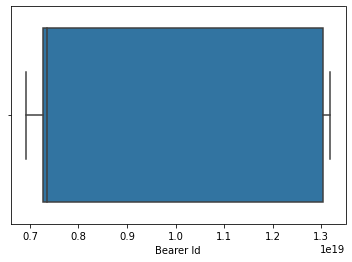

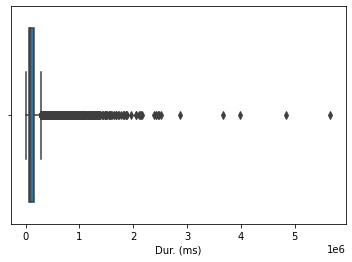

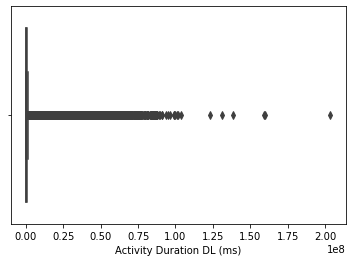

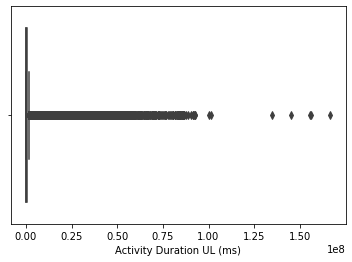

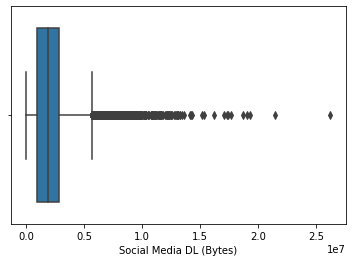

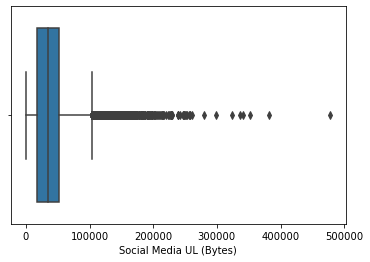

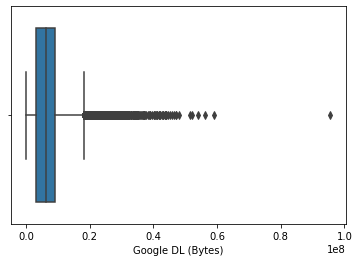

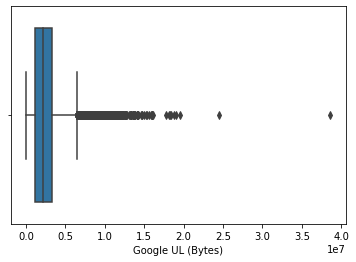

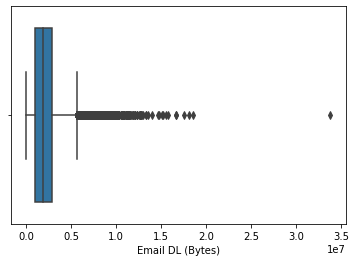

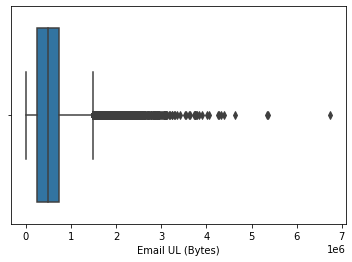

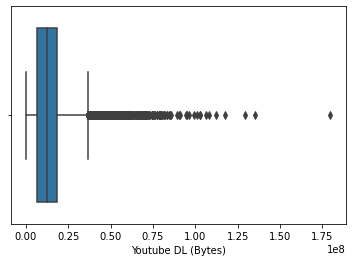

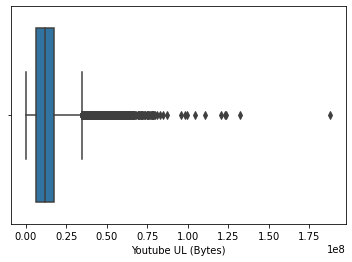

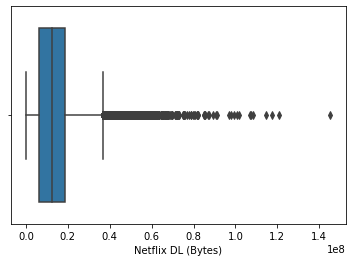

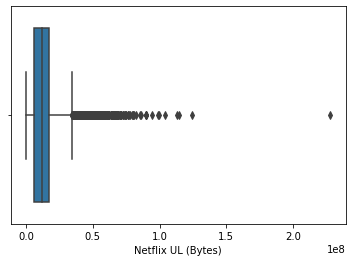

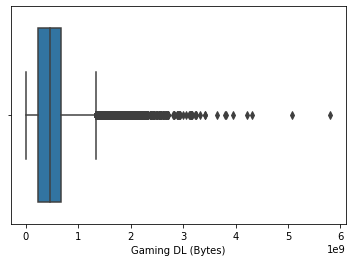

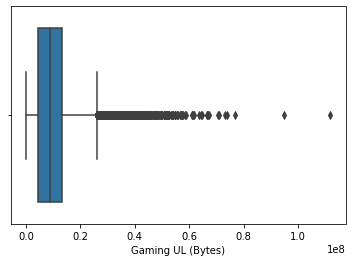

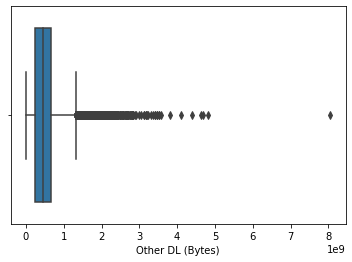

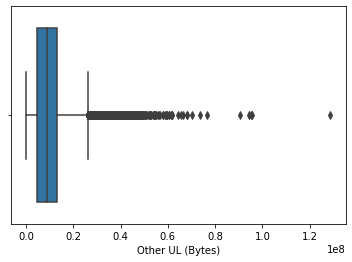

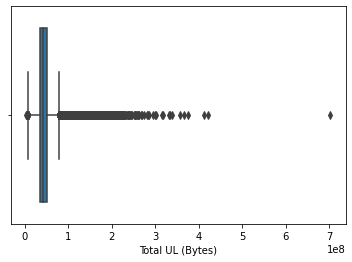

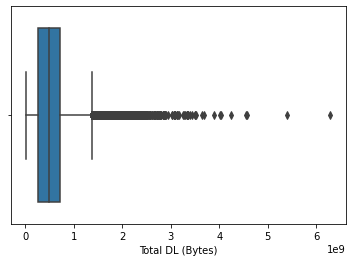

In [20]:
for i in df.columns:
    sns.boxplot(x=i,data=df)
    plt.show()

In [21]:
Metrics=['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)']


In [22]:
val=df[Metrics].sum()


In [23]:
val

Social Media DL (Bytes)    2.675049e+11
Social Media UL (Bytes)    4.906285e+09
Google DL (Bytes)          8.570251e+11
Google UL (Bytes)          3.064445e+11
Email DL (Bytes)           2.669696e+11
Email UL (Bytes)           6.965017e+10
Youtube DL (Bytes)         1.733429e+12
Youtube UL (Bytes)         1.640557e+12
Netflix DL (Bytes)         1.732382e+12
Netflix UL (Bytes)         1.639515e+12
Gaming DL (Bytes)          6.289590e+13
Gaming UL (Bytes)          1.235287e+12
Other DL (Bytes)           6.275445e+13
Other UL (Bytes)           1.231290e+12
Total UL (Bytes)           6.127649e+12
Total DL (Bytes)           6.775321e+13
dtype: float64

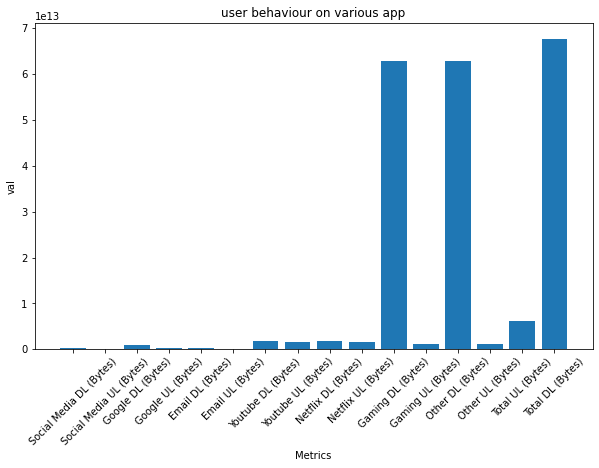

In [24]:
# plot the bar graph to view user behaviour
plt.figure(figsize=(10,6))
plt.bar(Metrics,val)  
plt.title('user behaviour on various app') # Set Title 
plt.xlabel('Metrics')
plt.ylabel('val')
plt.xticks(rotation=45) # rotate x label for readability
plt.show()



In [25]:
user_df.skew()

Bearer Id                    0.182443
Dur. (ms)                    7.402203
Activity Duration DL (ms)    6.159777
Activity Duration UL (ms)    7.538985
Social Media DL (Bytes)      1.231431
Social Media UL (Bytes)      1.180260
Google DL (Bytes)            1.211919
Google UL (Bytes)            1.248976
Email DL (Bytes)             1.224819
Email UL (Bytes)             1.248869
Youtube DL (Bytes)           1.223591
Youtube UL (Bytes)           1.245732
Netflix DL (Bytes)           1.145590
Netflix UL (Bytes)           1.272487
Gaming DL (Bytes)            1.163896
Gaming UL (Bytes)            1.153490
Other DL (Bytes)             1.270813
Other UL (Bytes)             1.222591
Total UL (Bytes)             3.051802
Total DL (Bytes)             1.301239
dtype: float64

 if skewness is betn -0.5 and 0.5 the data is nearly symmetrical.
 And skewness range betn -1 and -0.5 are negatively skewed.,
 and if range is betn 0.5 to 1 data is positively skewed and if range greater than 1  data is extremly skewed


### Task 1.2

Task 1.2 - Conduct exploratory data analysis on those data & communicate useful insights. 
Ensure that you identify and treat all missing values and outliers in the dataset by replacing them 
with the mean of the corresponding column.
You’re expected to report about the following using Python script and slide :
• Describe all relevant variables and associated data types (slide). 
• Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance 
for the global objective.
• Conduct a Non-Graphical Univariate Analysis by computing dispersion parameters for 
each quantitative variable and provide useful interpretation. 
• Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options 
for each variable and interpreting your findings.
• Bivariate Analysis – explore the relationship between each application & the total DL+UL 
data using appropriate methods and interpret your findings. 
• Variable transformations – segment the users into the top five decile classes based on the 
total duration for all sessions and compute the total data (DL+UL) per decile class. 
• Correlation Analysis – compute a correlation matrix for the following variables and interpret 
your findings: Social Media data, Google data, Email data, Youtube data, Netflix data, 
Gaming data, and Other data 
• Dimensionality Reduction – perform a principal component analysis to reduce the 
dimensions of your data and provide a useful interpretation of the results (Provide your 
interpretation in four (4) bullet points maximum).

In [26]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [27]:
data.shape

(150001, 55)

In [28]:
data.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [29]:
data.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [31]:
# separate categorical and numerical  variable
categorical_feature=data.select_dtypes(include=[np.object])
categorical_feature.columns

Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')

In [32]:
numeric_feature=data.select_dtypes(include=[np.number])
numeric_feature.columns

Index(['Bearer Id', 'Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number',
       'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Soci

In [33]:
# fill missing values

In [34]:
for i in data.columns:
    
    if data[i].dtype == 'object':
        mode_value = data[i].mode()[0] 
        data[i].fillna(mode_value, inplace=True)
    else:
        mean_value = data[i].mean()
        data[i].fillna(mean_value, inplace=True)      

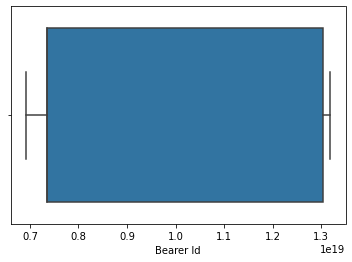

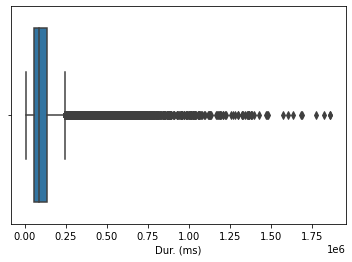

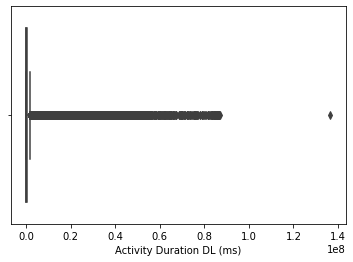

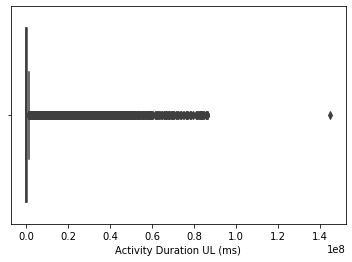

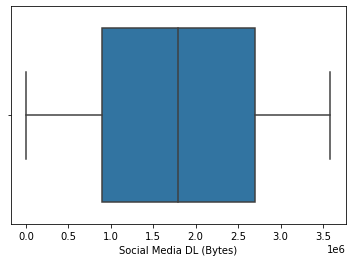

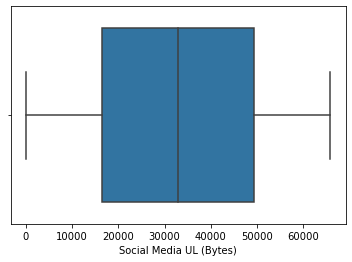

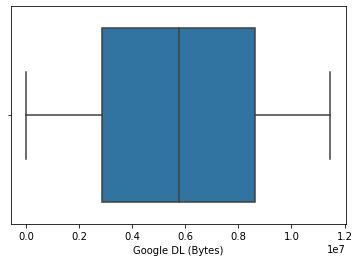

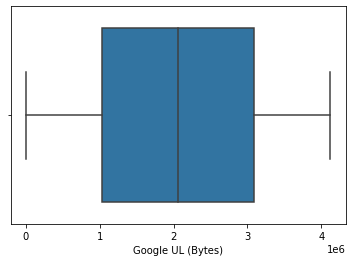

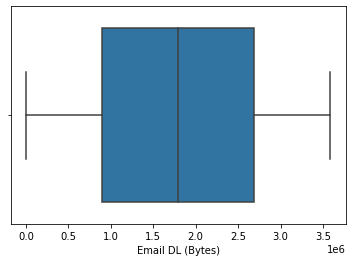

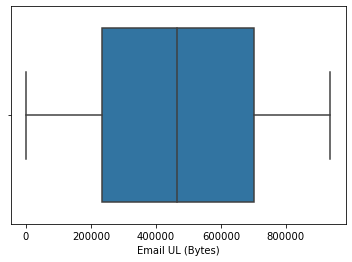

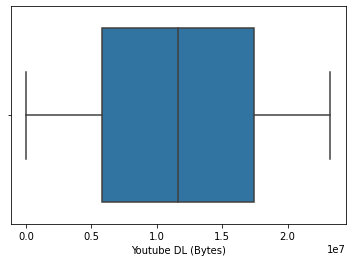

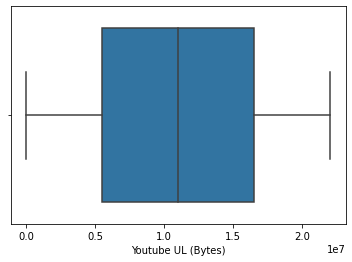

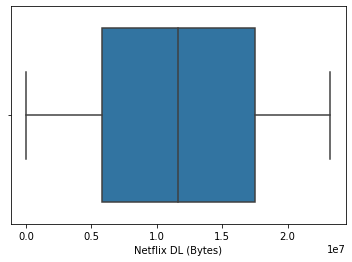

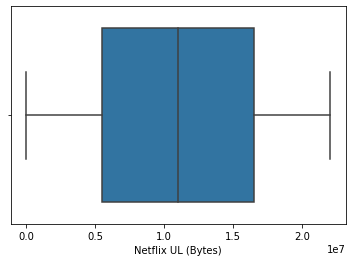

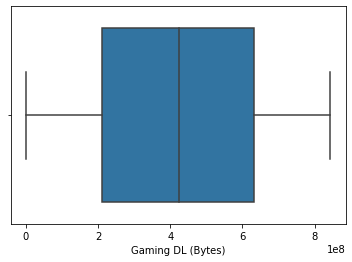

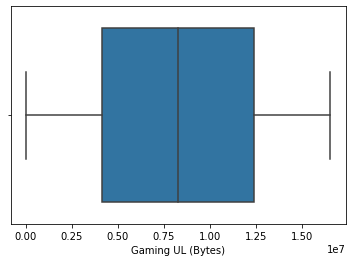

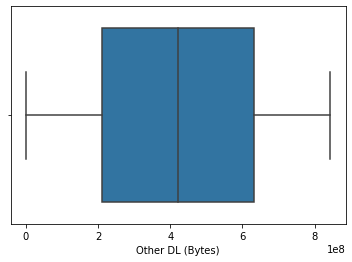

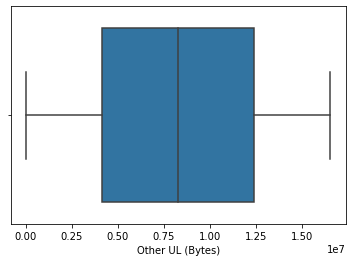

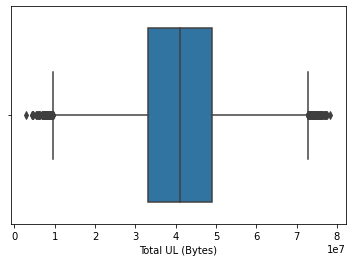

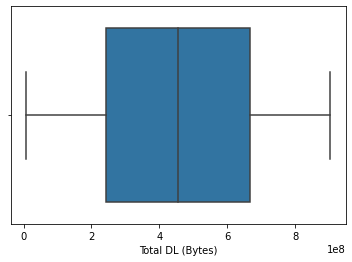

In [46]:
for i in df.columns:
    sns.boxplot(x=i,data=data)
    plt.show()

<Figure size 1080x360 with 0 Axes>

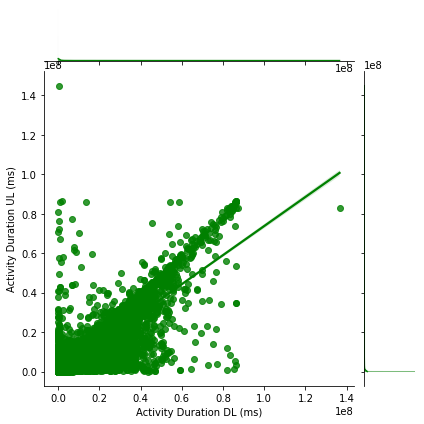

In [35]:
plt.figure(figsize=(15,5))
sns.jointplot(data['Activity Duration DL (ms)'],
              data['Activity Duration UL (ms)'],color='green',kind='reg')
plt.xlabel('Activity Duration DL (ms)')
plt.ylabel('Activity Duration UL (ms)')
plt.show()

In [36]:
#Basic col Analysis
col=['Dur. (ms)','Start ms','End ms','Total DL (Bytes)','Total UL (Bytes)']
stats=data[col].describe()
print(stats)

          Dur. (ms)       Start ms         End ms  Total DL (Bytes)  \
count  1.500010e+05  150001.000000  150001.000000      1.500010e+05   
mean   1.046086e+05     499.188200     498.800880      4.546434e+08   
std    8.103735e+04     288.610872     288.096693      2.441421e+08   
min    7.142000e+03       0.000000       0.000000      7.114041e+06   
25%    5.744200e+04     250.000000     251.000000      2.431072e+08   
50%    8.639900e+04     499.000000     500.000000      4.558409e+08   
75%    1.324300e+05     749.000000     750.000000      6.657051e+08   
max    1.859336e+06     999.000000     999.000000      9.029696e+08   

       Total UL (Bytes)  
count      1.500010e+05  
mean       4.112121e+07  
std        1.127635e+07  
min        2.866892e+06  
25%        3.322203e+07  
50%        4.114324e+07  
75%        4.903424e+07  
max        7.833131e+07  


In [37]:
# Non Graphical univariate Analysis
dispersion=data[col].std()
print(dispersion)

Dur. (ms)           8.103735e+04
Start ms            2.886109e+02
End ms              2.880967e+02
Total DL (Bytes)    2.441421e+08
Total UL (Bytes)    1.127635e+07
dtype: float64


array([[<AxesSubplot:title={'center':'Dur. (ms)'}>,
        <AxesSubplot:title={'center':'Start ms'}>],
       [<AxesSubplot:title={'center':'End ms'}>,
        <AxesSubplot:title={'center':'Total DL (Bytes)'}>],
       [<AxesSubplot:title={'center':'Total UL (Bytes)'}>,
        <AxesSubplot:>]], dtype=object)

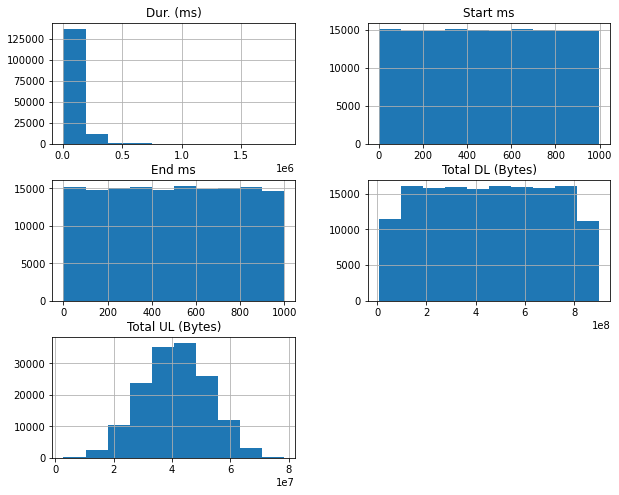

In [38]:
# Graphical Univariate Analysis
data.hist(column=col,bins=10,figsize=(10,8))

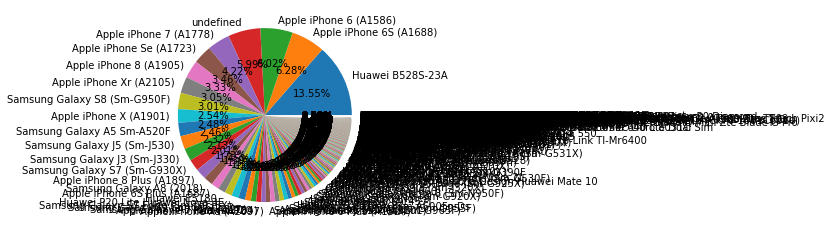

In [39]:
# pieplot
plt.pie(labels=data["Handset Type"].value_counts().index,
        x=data["Handset Type"].value_counts().values, autopct = '%1.2f%%')
plt.show();

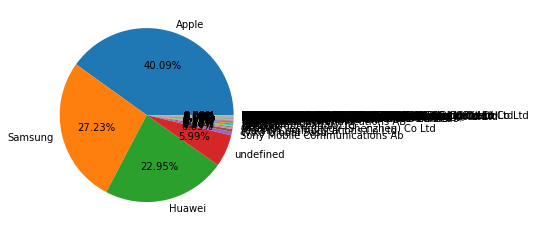

In [40]:
# pieplot
plt.pie(labels=data["Handset Manufacturer"].value_counts().index,
        x=data["Handset Manufacturer"].value_counts().values, autopct = '%1.2f%%')
plt.show();

In [41]:
# Bivariate Analysis
corr_matrix = data[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
       'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
       'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Total UL (Bytes)', 'Total DL (Bytes)']]

In [42]:
print(corr_matrix)

        Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                  1.545765e+06              24420.00000       1.634479e+06   
1                  1.926113e+06               7165.00000       3.493924e+06   
2                  1.684053e+06              42224.00000       8.535055e+06   
3                  6.441210e+05              13372.00000       9.023734e+06   
4                  8.626000e+05              50188.00000       6.248284e+06   
...                         ...                      ...                ...   
149996             3.464974e+06              52091.00000       9.967603e+06   
149997             2.344568e+06               7613.00000       2.229420e+06   
149998             1.245845e+06              14394.00000       3.850890e+06   
149999             8.015470e+05              21562.00000       4.189773e+06   
150000             1.795322e+06              32928.43438       5.750753e+06   

        Google UL (Bytes)  Email DL (Bytes)  Email 

<AxesSubplot:>

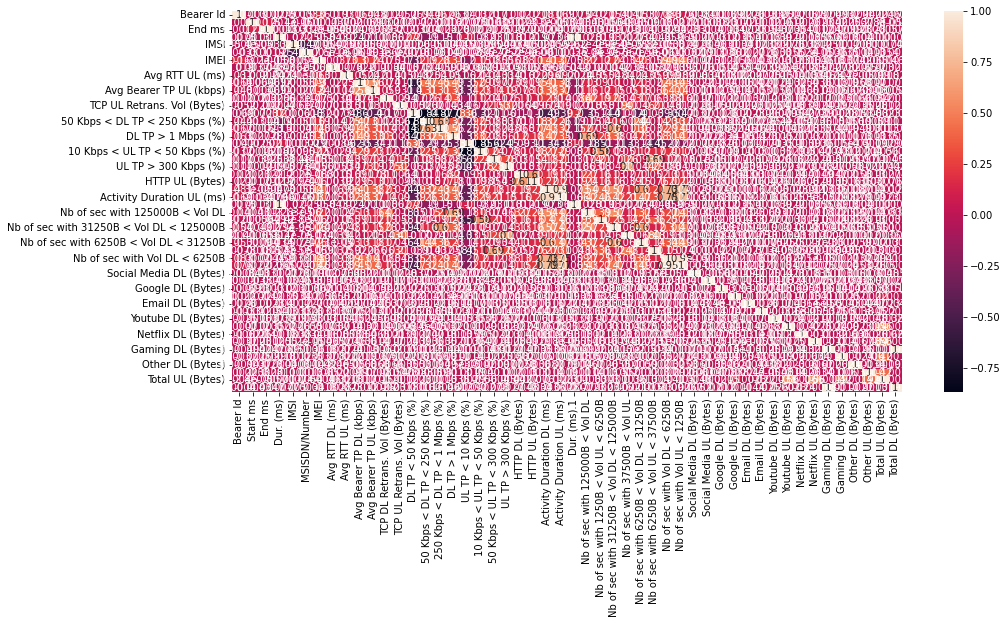

In [43]:
corr=data.corr()           # correlation in numerical feature
fig=plt.figure(figsize=(15,7))
sns.heatmap(corr,annot=True)

In [44]:
# outlier detection by IQR 
Q1 = np.percentile(df,25)
Q2 = np.percentile(df,50)
Q3 = np.percentile(df,75)
print(Q1,Q2,Q3)
IQR=Q3-Q1
print(IQR)

708696.5 6119892.0 27751546.5
27042850.0


In [49]:
print("IQR",Q3-Q1)

IQR 27042850.0
